In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [45]:
portfolio = pd.read_csv('../data/sample-portfolio.csv')
portfolio

,Ticker,Weight
0,AAPL,0.30
1,GOOGL,0.20
2,MSFT,0.25
3,NVDA,0.10
4,TSLA,0.15


In [46]:
tickers = portfolio['Ticker'].tolist()
start_date = '2022-01-01'
end_date = '2025-06-30'

data = yf.download(tickers, start=start_date, end=end_date)['Close']

data.head()

C:\Users\sheeb\AppData\Local\Temp\ipykernel_42716\67426440.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,GOOGL,MSFT,NVDA,TSLA
Date,,,,,
2022-01-03,178.645615,144.127121,325.038055,30.066132,399.926666
2022-01-04,176.378342,143.538651,319.464569,29.236650,383.196655
2022-01-05,171.686691,136.953629,307.200989,27.553720,362.706665
2022-01-06,168.820694,136.926300,304.773560,28.126675,354.899994
2022-01-07,168.987549,136.200165,304.928864,27.197371,342.320007


In [47]:
import sys
sys.path.append('../utils')  # manually add the utils folder

from portfolio_metrics import calculate_daily_returns


daily_returns = calculate_daily_returns(data)
daily_returns.head()

Ticker,AAPL,GOOGL,MSFT,NVDA,TSLA
Date,,,,,
2022-01-04,-0.012691,-0.004083,-0.017147,-0.027589,-0.041833
2022-01-05,-0.026600,-0.045876,-0.038388,-0.057562,-0.053471
2022-01-06,-0.016693,-0.000200,-0.007902,0.020794,-0.021523
2022-01-07,0.000988,-0.005303,0.000510,-0.033040,-0.035447
2022-01-10,0.000116,0.012060,0.000732,0.005615,0.030342


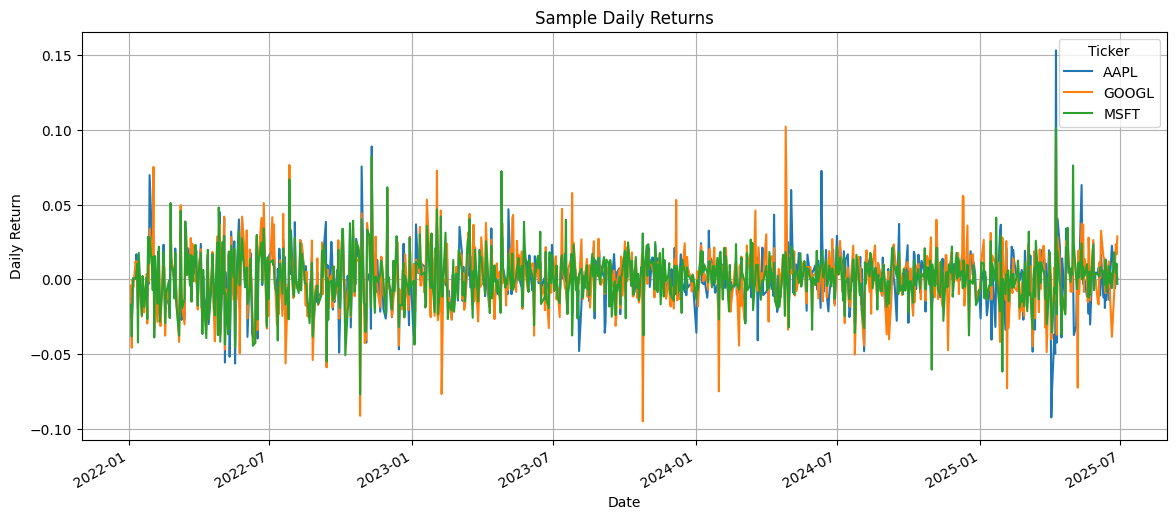

In [48]:

sample_tickers = daily_returns.columns[:3]  # Select first 3 tickers as a sample
daily_returns[sample_tickers].plot(figsize=(14,6), title="Sample Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()


In [49]:
# 1. Extract weights and ensure they align with daily_returns columns
weights = portfolio.set_index('Ticker').loc[daily_returns.columns, 'Weight'].values

# 2. Compute weighted daily returns for the portfolio
weighted_daily_returns = daily_returns.mul(weights, axis=1).sum(axis=1)

# 3. Display the first few rows
weighted_daily_returns.head()

Date
2022-01-04   -0.017945
2022-01-05   -0.040529
2022-01-06   -0.008172
2022-01-07   -0.009258
2022-01-10    0.007743
dtype: float64

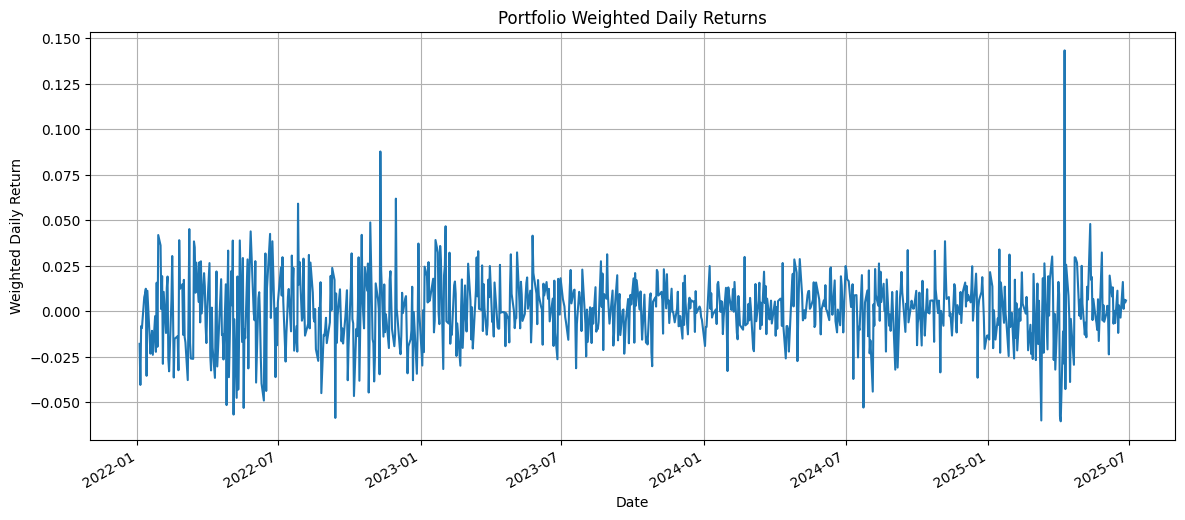

In [50]:
weighted_daily_returns.plot(figsize=(14,6), title="Portfolio Weighted Daily Returns")
plt.xlabel("Date")
plt.ylabel("Weighted Daily Return")
plt.grid(True)
plt.show()

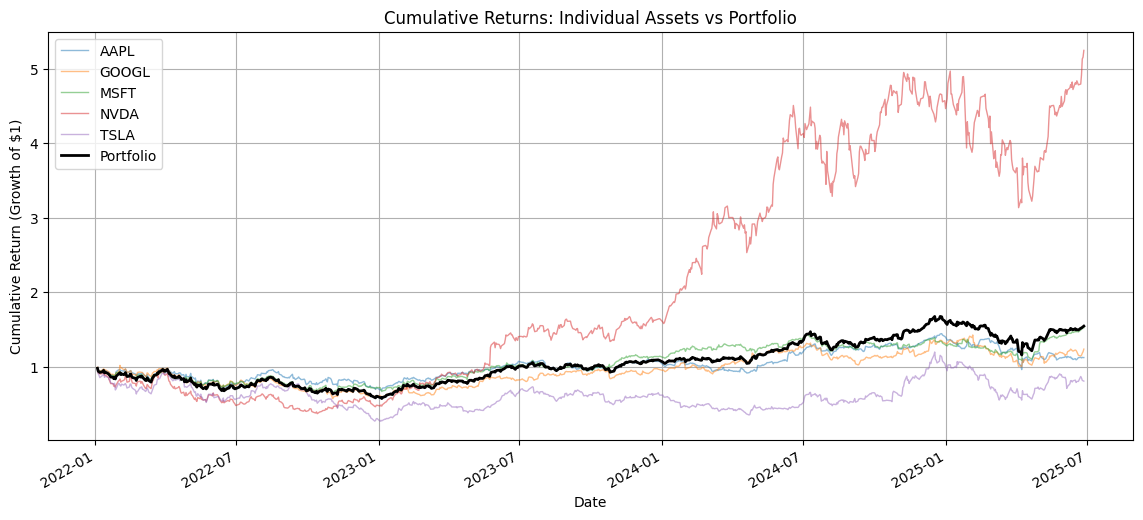

In [51]:
from portfolio_metrics import calculate_cumulative_returns

# Calculate cumulative returns for individual assets
cumulative_returns_assets = calculate_cumulative_returns(daily_returns)

# Calculate cumulative returns for the portfolio
cumulative_returns_portfolio = calculate_cumulative_returns(weighted_daily_returns)

# Plot cumulative returns
plt.figure(figsize=(14, 6))
cumulative_returns_assets.plot(ax=plt.gca(), legend=False, alpha=0.5, linewidth=1)
cumulative_returns_portfolio.plot(ax=plt.gca(), color='black', linewidth=2, label='Portfolio')

plt.title("Cumulative Returns: Individual Assets vs Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Growth of $1)")
plt.legend(list(cumulative_returns_assets.columns) + ['Portfolio'])
plt.grid(True)
plt.show()

In [52]:
from portfolio_metrics import annualized_return, annualized_volatility, sharpe_ratio

# Calculate metrics for the portfolio
ann_return = annualized_return(weighted_daily_returns)
ann_vol = annualized_volatility(weighted_daily_returns)
sharpe = sharpe_ratio(weighted_daily_returns)

# Create a summary table
metrics_df = pd.DataFrame({
    "Metric": ["Annualized Return", "Annualized Volatility", "Sharpe Ratio"],
    "Value": [ann_return, ann_vol, sharpe]
})

display(metrics_df)

,Metric,Value
0,Annualized Return,0.171426
1,Annualized Volatility,0.301998
2,Sharpe Ratio,0.567639
